In [13]:
#import
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import scipy as sp
from scipy.ndimage.filters import gaussian_filter1d
import sqlite3 as sql
import os
import pandas as pd
from datetime import datetime
from glob import glob
os.sys.path.append('../')
from utilities import *
from single_session_plots import *
from astropy.convolution import convolve, Gaussian1DKernel

import sklearn as sk
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
mouse = '4139190.3'

In [4]:
df = load_session_db()

df = df[df['RewardCount']>10]
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime'])

df_mouse = df[df['MouseName'].str.match(mouse)]
df_mouse = df_mouse[df_mouse['Track'].str.match('TwoTower_noTimeout') | df_mouse['Track'].str.match('TwoTower_Timeout')]
df_mouse = df_mouse.sort_values(['DateTime'])
df_mouse

,MouseName,DateFolder,SessionNumber,Track,RewardCount,Imaging,DateTime,data file,scanfile,scanmat
233,4139190.3,15_06_2018,3,TwoTower_noTimeout,45,1,2018-06-15,G:\My Drive\\VR_Data\TwoTower\4139190.3\15_06_...,G:\My Drive\2P_Data\TwoTower\4139190.3\15_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.3\15_06_2...
234,4139190.3,15_06_2018,1,TwoTower_noTimeout,57,1,2018-06-15,G:\My Drive\\VR_Data\TwoTower\4139190.3\15_06_...,G:\My Drive\2P_Data\TwoTower\4139190.3\15_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.3\15_06_2...
292,4139190.3,17_06_2018,2,TwoTower_noTimeout,109,1,2018-06-17,G:\My Drive\\VR_Data\TwoTower\4139190.3\17_06_...,G:\My Drive\2P_Data\TwoTower\4139190.3\17_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.3\17_06_2...
245,4139190.3,19_06_2018,2,TwoTower_Timeout,86,1,2018-06-19,G:\My Drive\\VR_Data\TwoTower\4139190.3\19_06_...,G:\My Drive\2P_Data\TwoTower\4139190.3\19_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.3\19_06_2...
278,4139190.3,21_06_2018,2,TwoTower_Timeout,82,1,2018-06-21,G:\My Drive\\VR_Data\TwoTower\4139190.3\21_06_...,G:\My Drive\2P_Data\TwoTower\4139190.3\21_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.3\21_06_2...
281,4139190.3,25_06_2018,2,TwoTower_Timeout,55,1,2018-06-25,G:\My Drive\\VR_Data\TwoTower\4139190.3\25_06_...,G:\My Drive\2P_Data\TwoTower\4139190.3\25_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.3\25_06_2...
273,4139190.3,28_06_2018,2,TwoTower_Timeout,57,1,2018-06-28,G:\My Drive\\VR_Data\TwoTower\4139190.3\28_06_...,G:\My Drive\2P_Data\TwoTower\4139190.3\28_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.3\28_06_2...
20,4139190.3,12_07_2018,1,TwoTower_Timeout,49,1,2018-07-12,G:\My Drive\\VR_Data\TwoTower\4139190.3\12_07_...,G:\My Drive\2P_Data\TwoTower\4139190.3\12_07_2...,G:\My Drive\2P_Data\TwoTower\4139190.3\12_07_2...
22,4139190.3,12_07_2018,2,TwoTower_Timeout,57,1,2018-07-12,G:\My Drive\\VR_Data\TwoTower\4139190.3\12_07_...,G:\My Drive\2P_Data\TwoTower\4139190.3\12_07_2...,G:\My Drive\2P_Data\TwoTower\4139190.3\12_07_2...
294,4139190.3,12_07_2018,1,TwoTower_Timeout,49,1,2018-07-12,G:\My Drive\\VR_Data\TwoTower\4139190.3\12_07_...,G:\My Drive\2P_Data\TwoTower\4139190.3\12_07_2...,G:\My Drive\2P_Data\TwoTower\4139190.3\12_07_2...


# Analyze place cell formation for 1st sessions

In [15]:
sess = df_mouse.iloc[0:2]
sess

,MouseName,DateFolder,SessionNumber,Track,RewardCount,Imaging,DateTime,data file,scanfile,scanmat
233,4139190.3,15_06_2018,3,TwoTower_noTimeout,45,1,2018-06-15,G:\My Drive\\VR_Data\TwoTower\4139190.3\15_06_...,G:\My Drive\2P_Data\TwoTower\4139190.3\15_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.3\15_06_2...
234,4139190.3,15_06_2018,1,TwoTower_noTimeout,57,1,2018-06-15,G:\My Drive\\VR_Data\TwoTower\4139190.3\15_06_...,G:\My Drive\2P_Data\TwoTower\4139190.3\15_06_2...,G:\My Drive\2P_Data\TwoTower\4139190.3\15_06_2...


In [27]:
sess1, sess0 = sess.iloc[0], sess.iloc[1]
behav1, behav0 = behavior_dataframe(sess1['data file'],sess1['scanmat'],concat=False),behavior_dataframe(sess0['data file'],sess0['scanmat'],concat=False)

G:\My Drive\2P_Data\TwoTower\4139190.3\15_06_2018\TwoTower_noTimeout\TwoTower_noTimeout_3_000.mat


C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:276: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  frame['ca inds'] = caInds
C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


G:\My Drive\2P_Data\TwoTower\4139190.3\15_06_2018\TwoTower_noTimeout\TwoTower_noTimeout_1_000.mat


C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:611: RuntimeWarning: invalid value encountered in true_divide
  rzone_lick_ratio[m] = np.divide(zone0_lick_rate,zone0_lick_rate+zone1_lick_rate)
C:\Users\mplitt\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


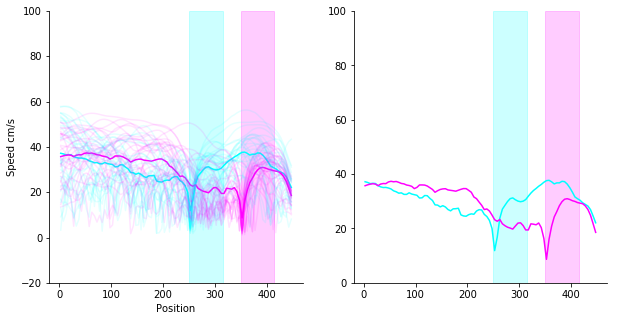

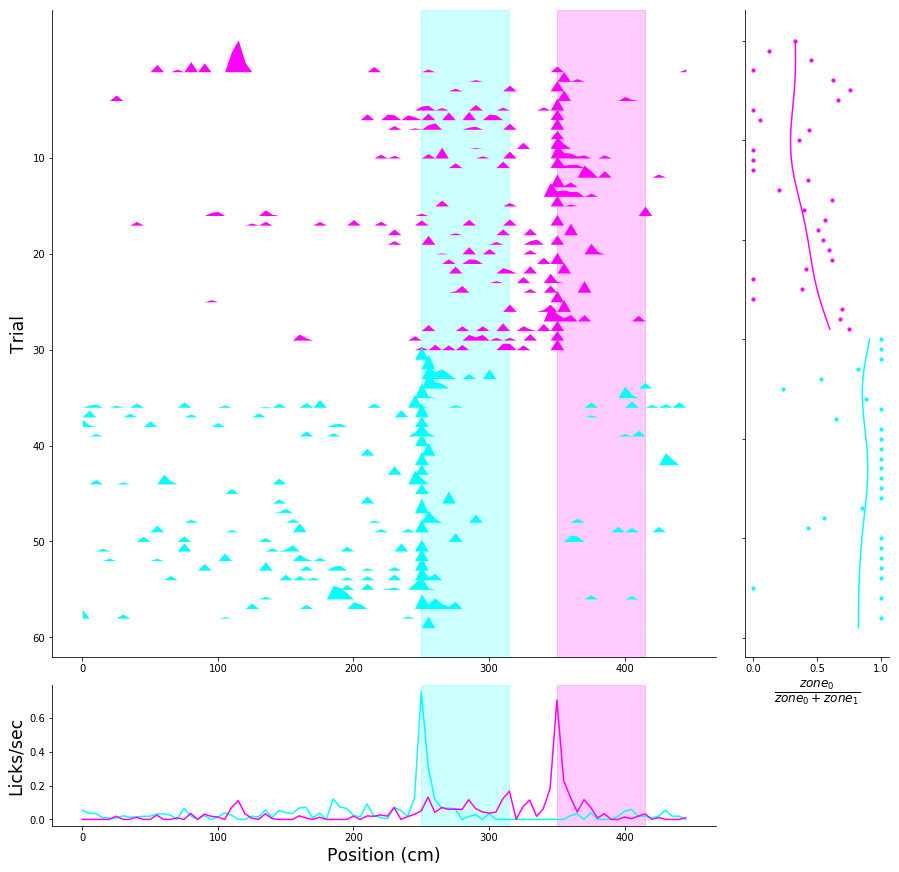

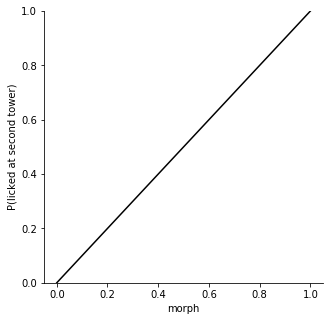

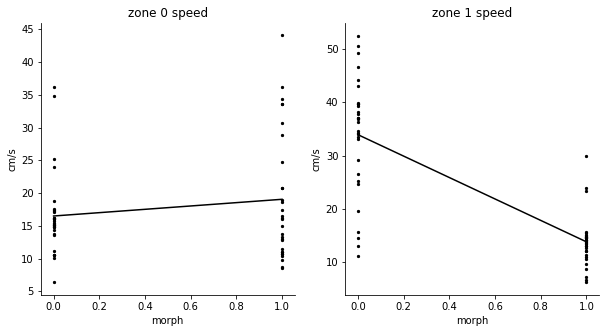

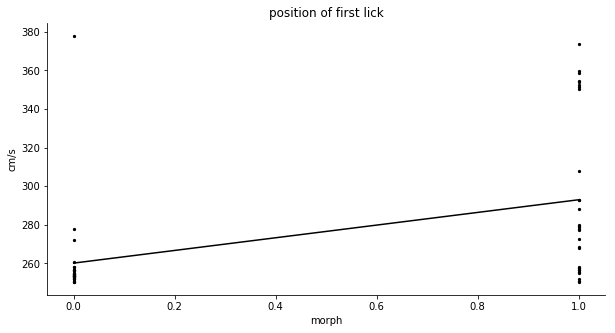

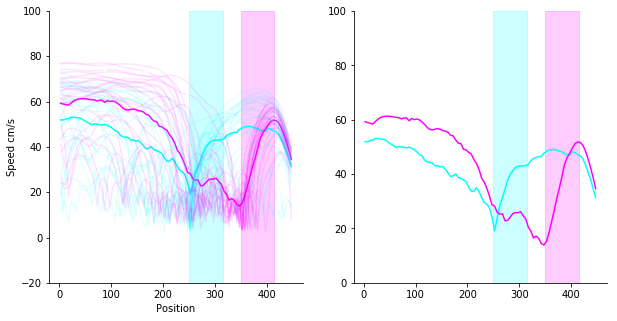

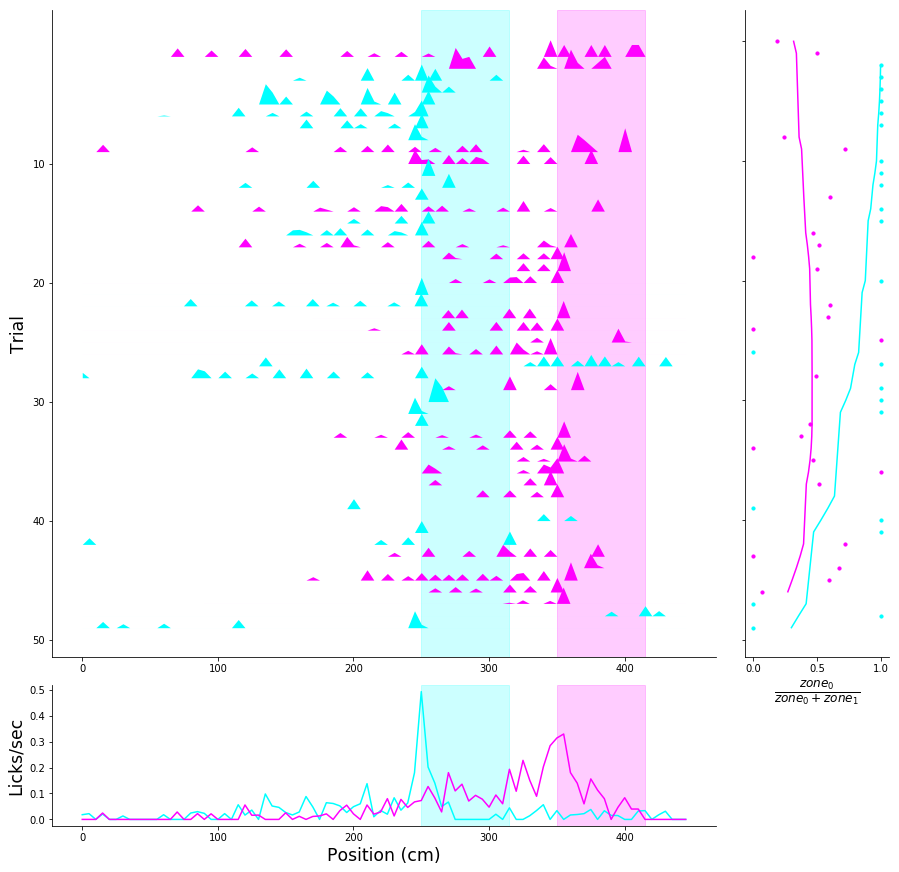

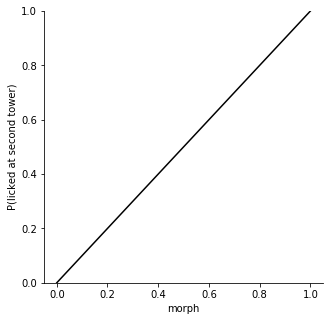

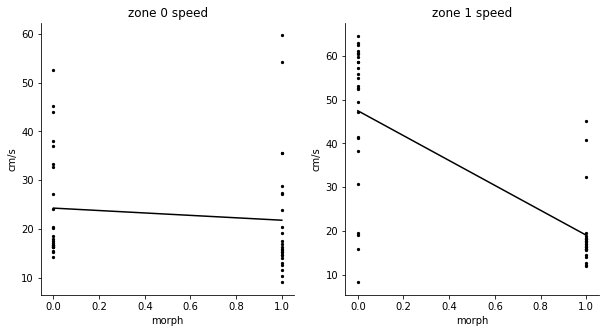

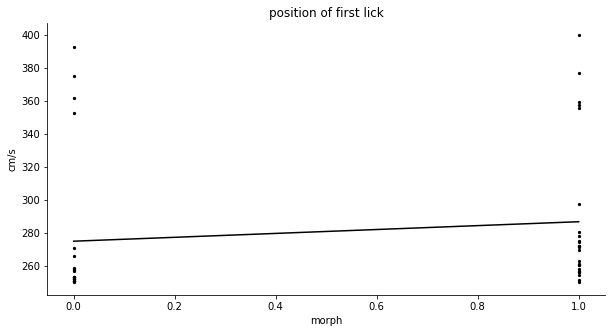

In [29]:
tmp = run_behavior(behav0,save=False,fbase = None, filestr = None, ratio = True)
tmp = run_behavior(behav1,save=False,ratio=True)

In [40]:
info0, info1 = loadmat_sbx(sess0['scanmat'])['info'], loadmat_sbx(sess1['scanmat'])['info']
ca_dat0 = load_ca_mat(sess0['scanfile'] )
ca_dat1 = load_ca_mat(sess1['scanfile'])
ca_dat = load_ca_mat("G:\\My Drive\\2P_Data\\TwoTower\\4139190.3\\15_06_2018\\TwoTower_noTimeout_1__TwoTower_noTimeout_3_cnmf_results_pre.mat")



C0,C1 = ca_dat['C_dec'][:ca_dat0['C_dec'].shape[0]+1] , ca_dat['C_dec'][ca_dat0['C_dec'].shape[0]+1:] 
C0 = C0[info0['frame'][0]:info0['frame'][-1]+1]
C1 = C1[info1['frame'][0]:info1['frame'][-1]+1]
C = np.vstack((C0,C1))
S0,S1 = ca_dat['S_dec'][:ca_dat0['S_dec'].shape[0]+1] , ca_dat['C_dec'][ca_dat0['C_dec'].shape[0]+1:] 
S0 = S0[info0['frame'][0]:info0['frame'][-1]+1]
S1 = S1[info1['frame'][0]:info1['frame'][-1]+1]




if behav0.shape[0]>C0.shape[0]:
    behav0 = behav0.iloc[:-behav0.shape[0]+C0.shape[0]]
if behav1.shape[0]>C1.shape[0]:
    behav1 = behav1.iloc[:-behav1.shape[0]+C1.shape[0]]
    
    
C0_z,C1_z  = sp.stats.zscore(C0,axis=0), sp.stats.zscore(C1,axis=0)
S0_z, S1_z = sp.stats.zscore(S0,axis=0),  sp.stats.zscore(S1,axis=0) 
S0_z_smooth, S1_z_smooth = gaussian_filter1d(S0_z,3,axis=0), gaussian_filter1d(S1_z,3,axis=0)
S0_smooth, S1_smooth = gaussian_filter1d(S0,3,axis=0), gaussian_filter1d(S1,3,axis=0)

G:\My Drive\2P_Data\TwoTower\4139190.3\15_06_2018\TwoTower_noTimeout\TwoTower_noTimeout_1_000.mat
G:\My Drive\2P_Data\TwoTower\4139190.3\15_06_2018\TwoTower_noTimeout\TwoTower_noTimeout_3_000.mat
#subsystem#not made into numpy array
#subsystem#not made into numpy array
#subsystem#not made into numpy array


C:\Users\mplitt\Anaconda3\lib\site-packages\scipy\stats\stats.py:2248: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


In [42]:
print(C0.shape,C1.shape)

(22726, 667) (15194, 667)


(22726,) (15194,)
37920
(37920, 667)


Text(0,0.5,'PC 4')

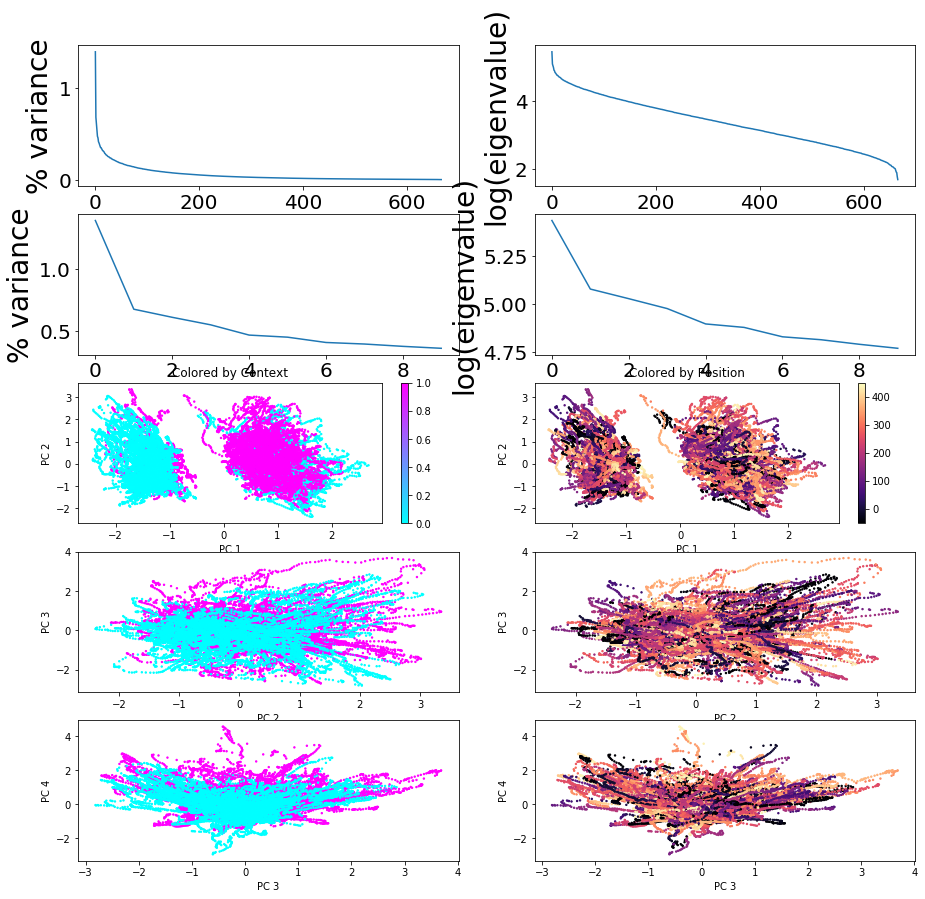

In [47]:
pca0, pca1, pca = PCA(),PCA(),PCA()
trialMask0,trialMask1 = (behav0['pos']>0) & (behav0['pos']<445),(behav1['pos']>0) & (behav1['pos']<445)
print(behav0['pos']._values.shape,behav1['pos']._values.shape)
pos = np.concatenate((behav0['pos']._values,behav1['pos']._values))
trialMask = (pos>0) & (pos<445)
print(len(trialMask))

X0,X1,X = pca0.fit_transform(C0),pca1.fit_transform(C1),pca.fit_transform(C)

print(X.shape)
# skree plots
f,axarr = plt.subplots(5,2,figsize=[15,15])
axarr[0,0].plot(pca.explained_variance_)
axarr[0,0].set_ylabel("% variance",size=28)
axarr[0,0].tick_params(labelsize=20)

axarr[0,1].plot(np.log(pca.singular_values_))
axarr[0,1].set_ylabel("log(eigenvalue)",size=28)
axarr[0,1].tick_params(labelsize=20)

axarr[1,0].plot(pca.explained_variance_[:10])
axarr[1,0].set_ylabel("% variance",size=28)
axarr[1,0].tick_params(labelsize=20)


axarr[1,1].plot(np.log(pca.singular_values_[:10]))
axarr[1,1].set_ylabel("log(eigenvalue)",size=28)
axarr[1,1].tick_params(labelsize=20)




s_cxt=axarr[2,0].scatter(X[trialMask,0],X[trialMask,1],
                           c=data_TO.loc[trialMask,'morph']._values,cmap='cool',s=2)
plt.colorbar(s_cxt,ax=axarr[2,0])
axarr[2,0].set_title('Colored by Context')
axarr[2,0].set_xlabel("PC 1")
axarr[2,0].set_ylabel("PC 2")


s_pos=axarr[2,1].scatter(X[trialMask,0],X[trialMask,1],c=data_TO.loc[trialMask,'pos'],cmap='magma',s=2)
plt.colorbar(s_pos,ax=axarr[2,1])
axarr[2,1].set_title('Colored by Position')
axarr[2,1].set_xlabel("PC 1")
axarr[2,1].set_ylabel("PC 2")


s_cxt=axarr[3,0].scatter(X[trialMask,1],X[trialMask,2],c=data_TO.loc[trialMask,'morph'],cmap='cool',s=2)
axarr[3,0].set_xlabel("PC 2")
axarr[3,0].set_ylabel("PC 3")

s_cxt=axarr[3,1].scatter(X[trialMask,1],X[trialMask,2],c=data_TO.loc[trialMask,'pos'],cmap='magma',s=2)
axarr[3,1].set_xlabel("PC 2")
axarr[3,1].set_ylabel("PC 3")


s_cxt=axarr[4,0].scatter(X[trialMask,2],X[trialMask,3],c=data_TO.loc[trialMask,'morph'],cmap='cool',s=2)
axarr[4,0].set_xlabel("PC 3")
axarr[4,0].set_ylabel("PC 4")

s_cxt=axarr[4,1].scatter(X[trialMask,2],X[trialMask,3],c=data_TO.loc[trialMask,'pos'],cmap='magma',s=2)
axarr[4,1].set_xlabel("PC 3")
axarr[4,1].set_ylabel("PC 4")

In [ ]:
morphs = np.sort(np.unique(data_TO['morph']._values))
f,ax = plt.subplots(2,int(morphs.shape[0]),figsize=[5*int(morphs.shape[0]),15])


mask0 = data_TO['morph']==0
frmap0, occupancy0 = rate_map(C[mask0,:],data_TO.loc[mask0,'pos'])
si0 = spatial_info(frmap0,occupancy0)
p0 = spatial_info_perm_test(si0,C[mask0,:],data_TO.loc[mask0,'pos'],nperms = 100)
maxInds0 = np.argmax(frmap0,axis=0)
p0_mask = np.argsort(maxInds0)
p0_mask = p0_mask[p0>.95]
#ax[0,0].imshow(frmap0[:,p0_mask].T,aspect='auto')

mask1 = data_TO['morph']==1
frmap1, occupancy1 = rate_map(C[mask1,:],data_TO.loc[mask1,'pos'])
si1 = spatial_info(frmap1,occupancy1)
p1 = spatial_info_perm_test(si1,C[mask1,:],data_TO.loc[mask1,'pos'],nperms = 100)
maxInds1 = np.argmax(frmap1,axis=0)
p1_mask = np.argsort(maxInds1)
p1_mask = p1_mask[p1>.95]